**Data Analysis of the Quantative Survey Results**

**1st Research Question:** 
How do Austrian citizens perceive the trustworthiness of AI-driven decisions in key public services such as tax administration, social benefit distribution, and AMS services?


In [1]:
!pip install openpyxl

import openpyxl 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the Excel file
file_path = "Data.xlsx"

# Display sheet names to identify the correct sheet
excel_data = pd.ExcelFile(file_path)
print(excel_data.sheet_names)

df = pd.read_excel(file_path, sheet_name='Data')  

# Display the first few rows to understand the structure
print(df.head())


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 54.0 MB/s eta 0:00:00


/opt/conda/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/opt/conda/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


['Data']
                         CASE                                         STARTED  \
0  Interview number (ongoing)  Time the interview has started (Europe/Berlin)   
1                          50                             2024-12-10 10:00:14   
2                          62                             2024-12-10 11:02:36   
3                          67                             2024-12-10 11:12:21   
4                          72                             2024-12-10 11:15:10   

                                             B010_01  B010_02  B010_03  \
0  Tax Scenario: How likely are you to trust AI i...      NaN      NaN   
1                                                  3      2.0      2.0   
2                                                  4      5.0      5.0   
3                                                  3      4.0      4.0   
4                                                  3      4.0      4.0   

   B010_04  B011_01  B011_02  B011_03  B011_04  ...  TIME00

**Perceived Trust in the 2 Scenarios Shown in the Survey**

We look into how trustworthy - on a scale 1 to 5 - respondents perceive the use of AI in the interaction with (1) tax return administration and (2) family benefit administration, respectively. 

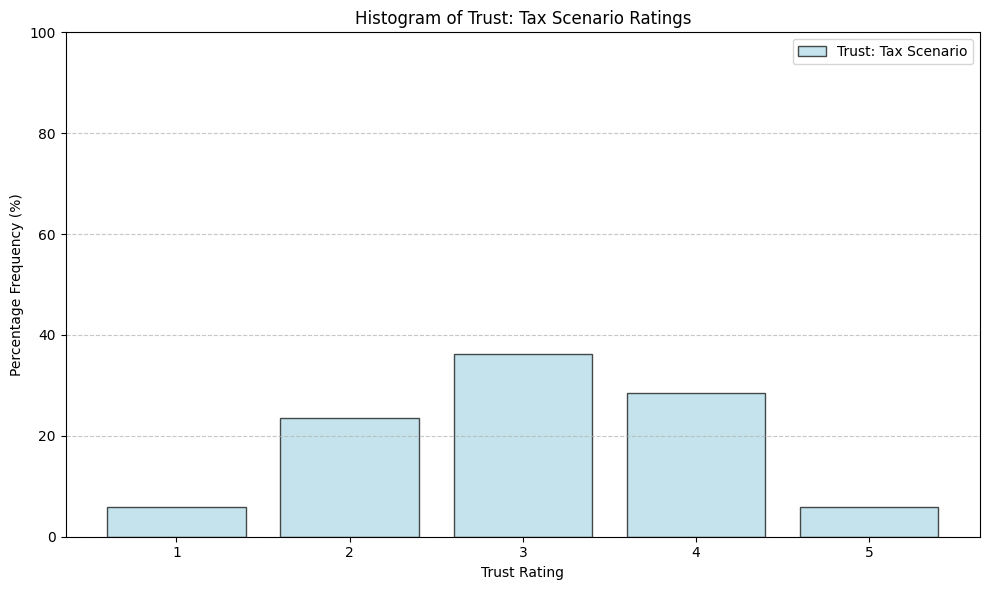

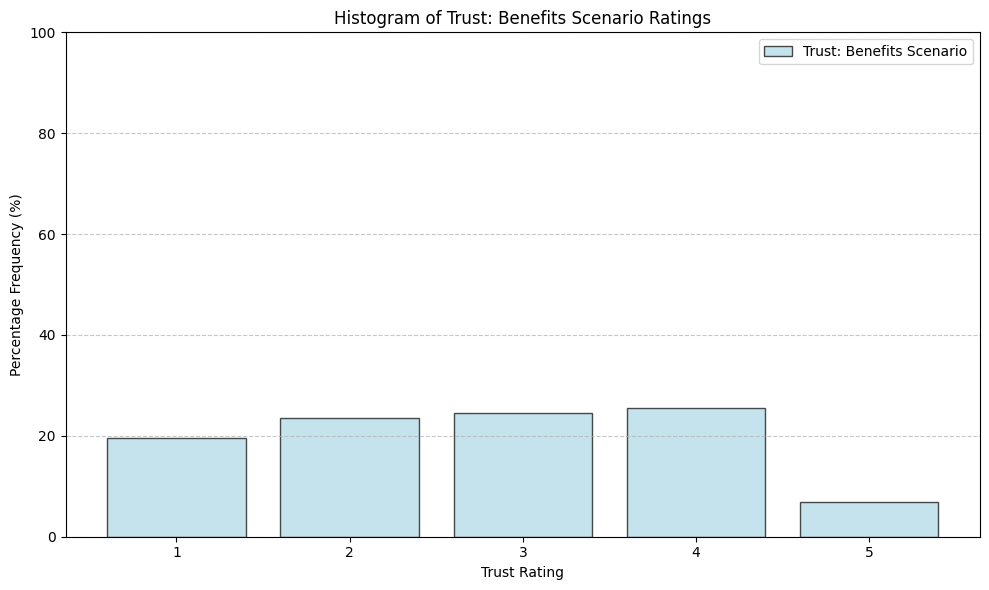

In [11]:
# Histograms (percentage frequencies with light blue bars)
for scenario in ['Trust: Tax Scenario', 'Trust: Benefits Scenario']:
    plt.figure(figsize=(10, 6))
    bins = np.arange(1, 6.5, 1)  # Define bin edges with step of 1
    
    data_scenario = data[scenario].dropna()
    hist, _ = np.histogram(data_scenario, bins=bins)
    total_count = len(data_scenario)  # Total counts for this scenario
    hist_percentage = (hist / total_count) * 100  # Normalize to percentage frequencies
    
    plt.bar(bins[:-1], hist_percentage, width=0.8, alpha=0.7, color='lightblue', edgecolor='black', label=scenario)
    plt.title(f'Histogram of {scenario} Ratings')
    plt.xlabel('Trust Rating')
    plt.ylabel('Percentage Frequency (%)')
    plt.ylim(0, 100)  # Adjust y-axis scale to percentages
    plt.xticks(ticks=np.arange(1, 6), labels=np.arange(1, 6))  # Display ticks 1-5
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.legend()
    plt.show()


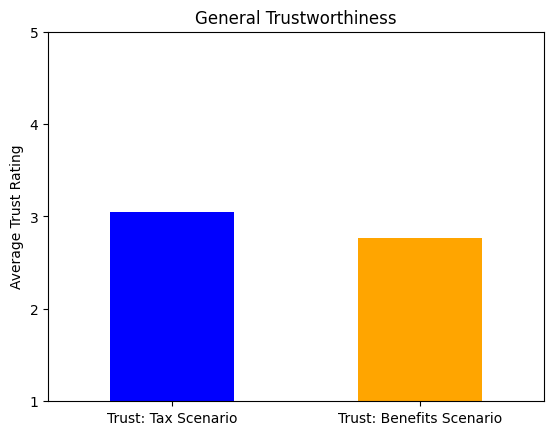

Average Trust Ratings:
Tax Scenario Trust Rating: 3.05
Benefits Scenario Trust Rating: 2.76


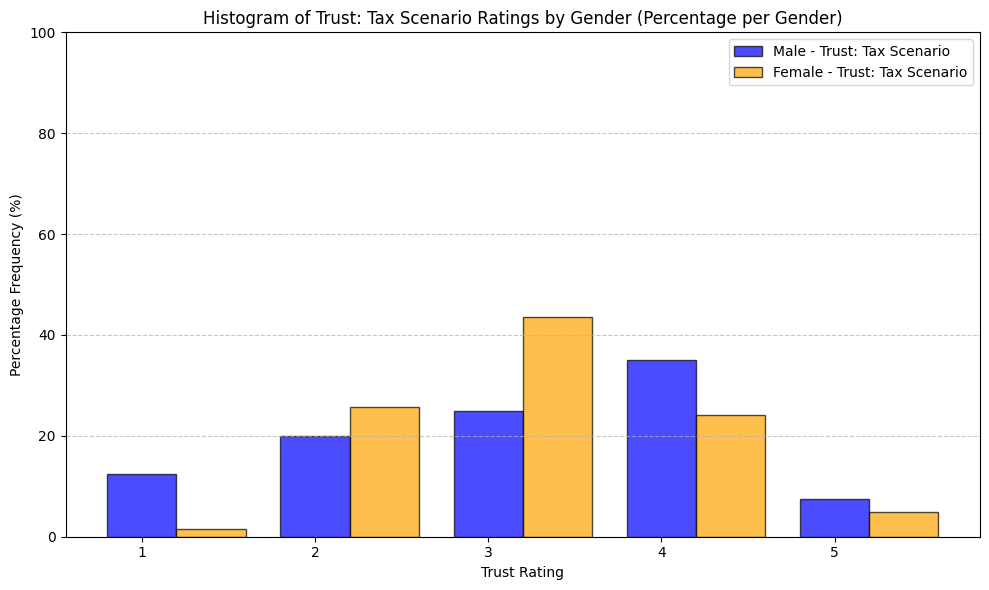

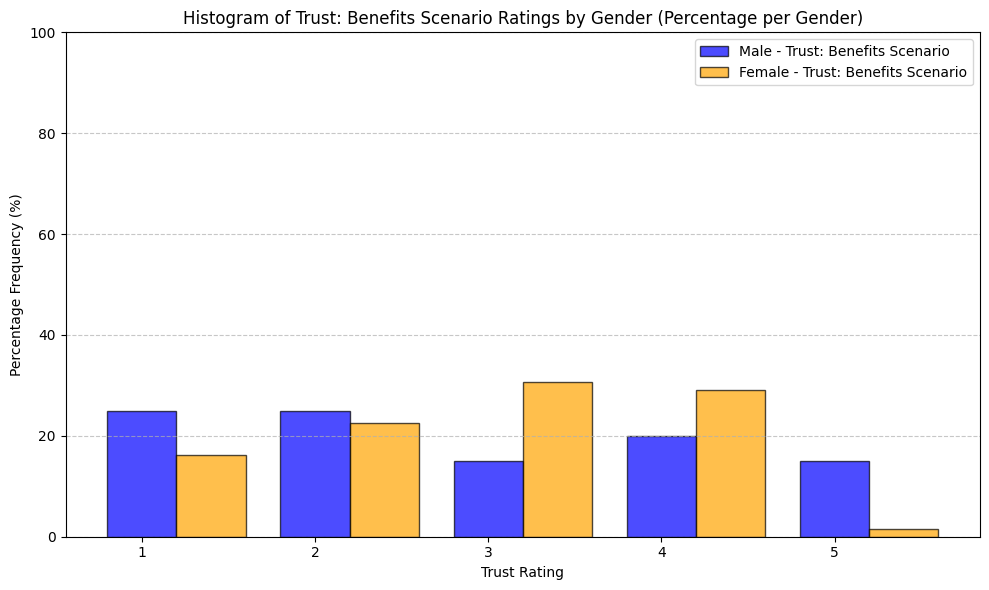

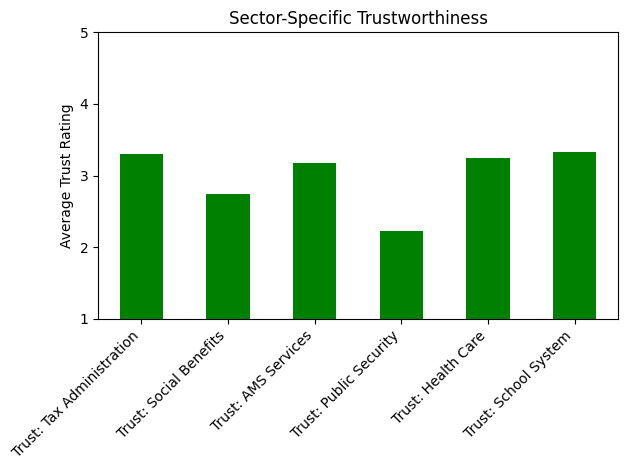

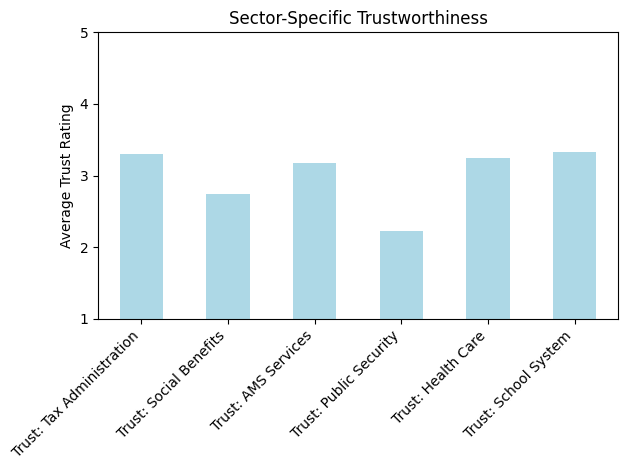

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
file_path = "Data.xlsx"  # Update with the correct path if needed
data = pd.read_excel(file_path, sheet_name='Data')

# Extract and rename relevant columns
data = data.rename(columns={
    'B010_01': 'Trust: Tax Scenario',
    'B011_01': 'Trust: Benefits Scenario',
    'D002_01': 'Trust: Tax Administration',
    'D002_02': 'Trust: Social Benefits',
    'D002_03': 'Trust: AMS Services',
    'D002_04': 'Trust: Public Security',
    'D002_05': 'Trust: Health Care',
    'D002_06': 'Trust: School System'
})

# Convert general trust columns to numeric
data['Trust: Tax Scenario'] = pd.to_numeric(data['Trust: Tax Scenario'], errors='coerce')
data['Trust: Benefits Scenario'] = pd.to_numeric(data['Trust: Benefits Scenario'], errors='coerce')

# General trust bar chart
general_trust = data[['Trust: Tax Scenario', 'Trust: Benefits Scenario']].mean()
general_trust.plot(kind='bar', color=['blue', 'orange'])
plt.title('General Trustworthiness')
plt.ylabel('Average Trust Rating')
plt.xticks(rotation=0)
plt.yticks(np.arange(1, 6, 1))  # Adjust y-axis scale to 1-5 in steps of 1
plt.ylim(1, 5)
plt.show()

# Calculate and print the average trust ratings
print("Average Trust Ratings:")
print(f"Tax Scenario Trust Rating: {data['Trust: Tax Scenario'].mean():.2f}")
print(f"Benefits Scenario Trust Rating: {data['Trust: Benefits Scenario'].mean():.2f}")

# Histograms grouped by gender (percentage frequencies normalized per gender)
for scenario in ['Trust: Tax Scenario', 'Trust: Benefits Scenario']:
    plt.figure(figsize=(10, 6))
    width = 0.4  # Width of the bars
    bins = np.arange(1, 6.5, 1)  # Define common bin edges with step of 1

    for i, (gender, gender_label, color) in enumerate(zip([1, 2], ['Male', 'Female'], ['blue', 'orange'])):
        data_gender = data[data['F002'] == gender][scenario].dropna()
        hist, _ = np.histogram(data_gender, bins=bins)
        total_gender_count = len(data_gender)  # Total counts for this gender
        hist_percentage = (hist / total_gender_count) * 100  # Normalize within gender
        plt.bar(bins[:-1] + i * width, hist_percentage, width=width, alpha=0.7, label=f'{gender_label} - {scenario}', color=color, edgecolor='black')

    plt.title(f'Histogram of {scenario} Ratings by Gender (Percentage per Gender)')
    plt.xlabel('Trust Rating')
    plt.ylabel('Percentage Frequency (%)')
    plt.ylim(0, 100)  # Adjust y-axis scale to percentages
    plt.xticks(ticks=np.arange(1, 6), labels=np.arange(1, 6))  # Display ticks 1-5
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Convert sector-specific trust columns to numeric
sector_columns = ['Trust: Tax Administration', 'Trust: Social Benefits', 
                  'Trust: AMS Services', 'Trust: Public Security', 
                  'Trust: Health Care', 'Trust: School System']
for col in sector_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Sector-specific trust bar chart
sector_trust = data[sector_columns].mean()
sector_trust.plot(kind='bar', color='green')
plt.title('Sector-Specific Trustworthiness')
plt.ylabel('Average Trust Rating')
plt.xticks(rotation=45, ha='right')
plt.yticks(np.arange(1, 6, 1))  # Adjust y-axis scale to 1-5 in steps of 1
plt.ylim(1, 5)
plt.tight_layout()
plt.show()


# Sector-specific trust bar chart
sector_trust = data[sector_columns].mean()
sector_trust.plot(kind='bar', color='lightblue')
plt.title('Sector-Specific Trustworthiness')
plt.ylabel('Average Trust Rating')
plt.xticks(rotation=45, ha='right')
plt.yticks(np.arange(1, 6, 1))  # Adjust y-axis scale to 1-5 in steps of 1
plt.ylim(1, 5)
plt.tight_layout()
plt.show()



Interpretation trust in the two scenarios: 
- Trust doesn't vary significantly between the two scenarios (tax and social benefits). But it is very neutral (3.05) for tax whereas it is slightly negative for social benefits (2.76).
- For tax administration the average answer is that participants are *neutral to somewhat likely* to trust AI in making the correct decision, for social benefits it is *neutral to somewhat unlikely*.

Interpretation trust across all sectors (not scenario related):
   -  It is obvious that respondents evaluate trust differently across sectors. Hence the use of AI should not be a general decision but must be evaluated independently for different use cases and sectors.
   - Public Security is by far the sector with the lowest trust in AI making decisions. 
   - Tax administration, along health care, school system, and AMS services, are the sectors where participants trust AI more - it is neutral to slightly positive for these sectors. 
    - Tax admin. is rated slightly better compared to when asked related to the scenario.
    - Social Benefits is rated the same as within scenario connection.
    - Note that AI implementation is rated more trustworthy in tax than in benefits in both questions. This makes the answers more robust.

Average Trust Ratings:
Male - Trust: Tax Scenario: 3.05
Male - Trust: Benefits Scenario: 2.75
Female - Trust: Tax Scenario: 3.0483870967741935
Female - Trust: Benefits Scenario: 2.774193548387097


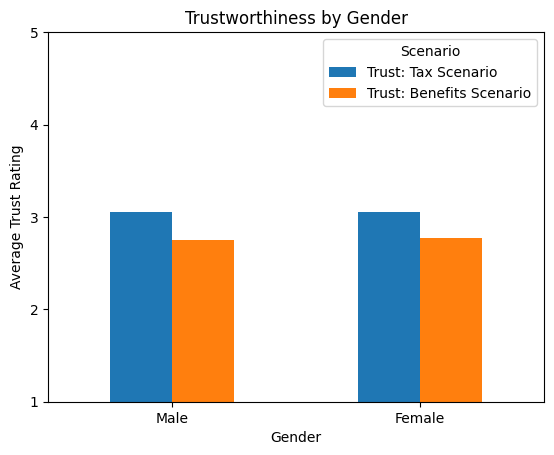

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Group by demographic (e.g., gender) and calculate average trust
data['Gender'] = pd.to_numeric(data['F002'], errors='coerce')  # Convert gender to numeric
gender_trust = data.groupby('Gender')[['Trust: Tax Scenario', 'Trust: Benefits Scenario']].mean()

# Print y-values for each group and scenario
print("Average Trust Ratings:")
print(f"Male - Trust: Tax Scenario: {gender_trust.loc[1, 'Trust: Tax Scenario']}")
print(f"Male - Trust: Benefits Scenario: {gender_trust.loc[1, 'Trust: Benefits Scenario']}")
print(f"Female - Trust: Tax Scenario: {gender_trust.loc[2, 'Trust: Tax Scenario']}")
print(f"Female - Trust: Benefits Scenario: {gender_trust.loc[2, 'Trust: Benefits Scenario']}")

# Plot trust by gender
gender_trust.plot(kind='bar')
plt.title('Trustworthiness by Gender')
plt.ylabel('Average Trust Rating')
plt.xticks([0, 1], ['Male', 'Female'], rotation=0)  # Replace with actual labels if available
plt.legend(title='Scenario')
plt.ylim(1, 5)  # Adjust y-axis scale to 1-5
plt.yticks(np.arange(1, 6, 1))  # Adjust y-axis scale in steps of 1
plt.show()


Interpretation: 
- trust in AI is slightly higher in tax administration than in social benefit sector as we have seen before
- there is no significant difference in perception between the genders. 
- in the tax scenario, both women and men rate trust 3.05
- in the social benefits scenario, women rate trust 2.77 and men 2.75

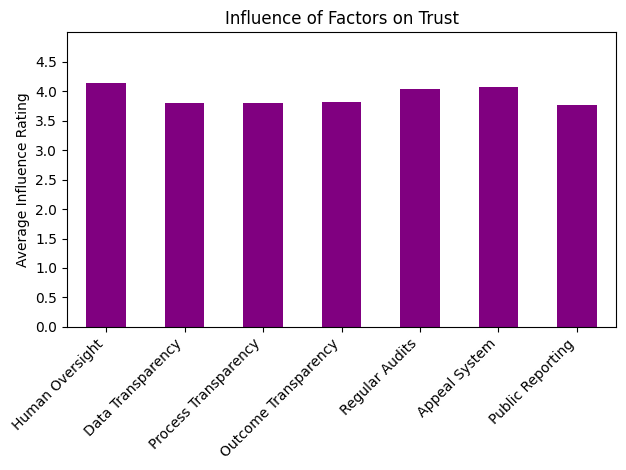

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Reload the dataset
file_path = 'Data.xlsx'
data_sheet = pd.read_excel(file_path, sheet_name='Data')

# Correct influence factor columns
influence_factors = [
    'D004_01',  # Human oversight
    'D004_02',  # Data transparency
    'D004_03',  # Process transparency
    'D004_04',  # Outcome transparency
    'D004_05',  # Regular audits
    'D004_06',  # Appeal system
    'D004_07'   # Public reporting
]
factor_labels = [
    'Human Oversight', 'Data Transparency', 'Process Transparency',
    'Outcome Transparency', 'Regular Audits', 'Appeal System', 'Public Reporting'
]

# Convert columns to numeric
data_sheet[influence_factors] = data_sheet[influence_factors].apply(pd.to_numeric, errors='coerce')

# Calculate average ratings for each factor
factor_influence = data_sheet[influence_factors].mean()
factor_influence.index = factor_labels

# Plot the influence factors
factor_influence.plot(kind='bar', color='purple')
plt.title('Influence of Factors on Trust')
plt.ylabel('Average Influence Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.ylim(0, 5)
plt.yticks(np.arange(0, 5, 0.5))
plt.show()


*shouldn't the plot above be part of the analysis of question 2 since it is referring to factors influencing AI?*

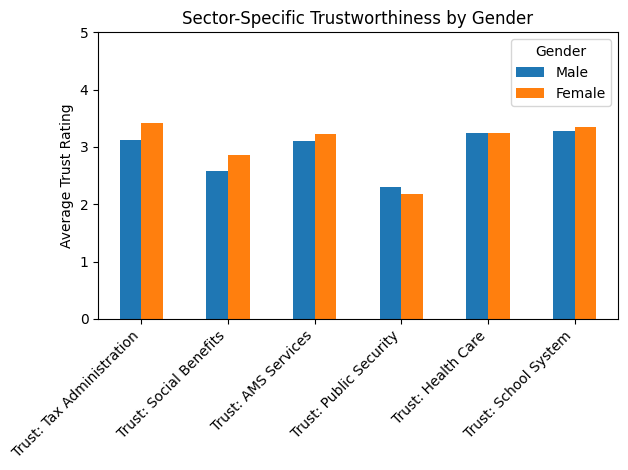

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

# Rename columns for clarity
data_sheet = data_sheet.rename(columns={
    'D002_01': 'Trust: Tax Administration',
    'D002_02': 'Trust: Social Benefits',
    'D002_03': 'Trust: AMS Services',
    'D002_04': 'Trust: Public Security',
    'D002_05': 'Trust: Health Care',
    'D002_06': 'Trust: School System'
})

# Ensure gender column is numeric
data_sheet['F002'] = pd.to_numeric(data_sheet['F002'], errors='coerce')  # Gender column

# Sector columns
data_sheet[sector_columns] = data_sheet[sector_columns].apply(pd.to_numeric, errors='coerce')
sector_columns = [
    'Trust: Tax Administration',
    'Trust: Social Benefits',
    'Trust: AMS Services',
    'Trust: Public Security',
    'Trust: Health Care',
    'Trust: School System'
]


# Plot: Sector-Specific Trust by Gender
gender_sector_trust = data_sheet.groupby('F002')[sector_columns].mean()
gender_sector_trust.T.plot(kind='bar')
plt.title('Sector-Specific Trustworthiness by Gender')
plt.ylabel('Average Trust Rating')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gender', labels=['Male', 'Female'])  # Adjust labels if necessary
plt.tight_layout()
plt.ylim(0, 5)
plt.show()


Interpretation:
  
- Women seem to have a higher trust in AI when asked for different sectors without scenario examples. 
- Only for public security, men trust more in AI than women, and for health care trust ratings are equal across both genders.
- For tax and social benefits this results in an inconsistency: when asked in the two scenarios, trust was equal across genders, whereas now in the non-scenario question, women seem to place a higher trust in AI than men. This inconsistency cannot be explained with the obtained data.


We add an additional column that averages out the respondent's trust across the above mentioned sectors. 
Then we will compare trust in specific sectors vs. trust when asked generically.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Reload the dataset
file_path = 'Data.xlsx'
data_sheet = pd.read_excel(file_path, sheet_name='Data')

# Columns to calculate the average for D002_average
columns_to_average = ['D002_01', 'D002_02', 'D002_03', 'D002_04', 'D002_05', 'D002_06']

# Create the 'D002_average' column
data_sheet['D002_average'] = data_sheet[columns_to_average].apply(pd.to_numeric, errors='coerce').mean(axis=1)

# Verify the new column
print(data_sheet[['D002_average']].head())

print(data_sheet[['D002_average']].mean())


# Print the average values of columns C009 and D001 for stating trust in AI in public services in general:
print("Average value of 'C009 AI in publ. serv. concerning(1) or beneficial(5)':")
print(data_sheet['C009'].mean())
print("Average value of 'D001 Trust AI processing data and making decisions in publ. serv.':")
print(data_sheet['D001'].mean())


   D002_average
0           NaN
1      3.500000
2      3.666667
3      2.000000
4      3.333333
D002_average    3.003268
dtype: float64
Average value of 'C009 AI in publ. serv. concerning(1) or beneficial(5)':
2.9705882352941178
Average value of 'D001 Trust AI processing data and making decisions in publ. serv.':
2.892156862745098


When participants are asked for their trust in specific sectors, the average rating of trustworthiness is 3. When asked more generally whether they trust AI processing data and making decisions in public services, the average rating is 2.89. There is a slight difference, showing that trust in AI might be higher when specific use cases are shown compared to asking in general. 

When asked whether AI is concerning(1) or beneficial(5) after looking into detailed factors, participants answer on average with 2.97 which is close to the other two questions. However, it does show that the two specific questions lead to a minimal higher trust rating compared to the general question.

**Correlations**

Next, we investigate to what extent familiarity wiht AI, experience with AI, and demographic factors influence the perceived trustworthiness of AI.


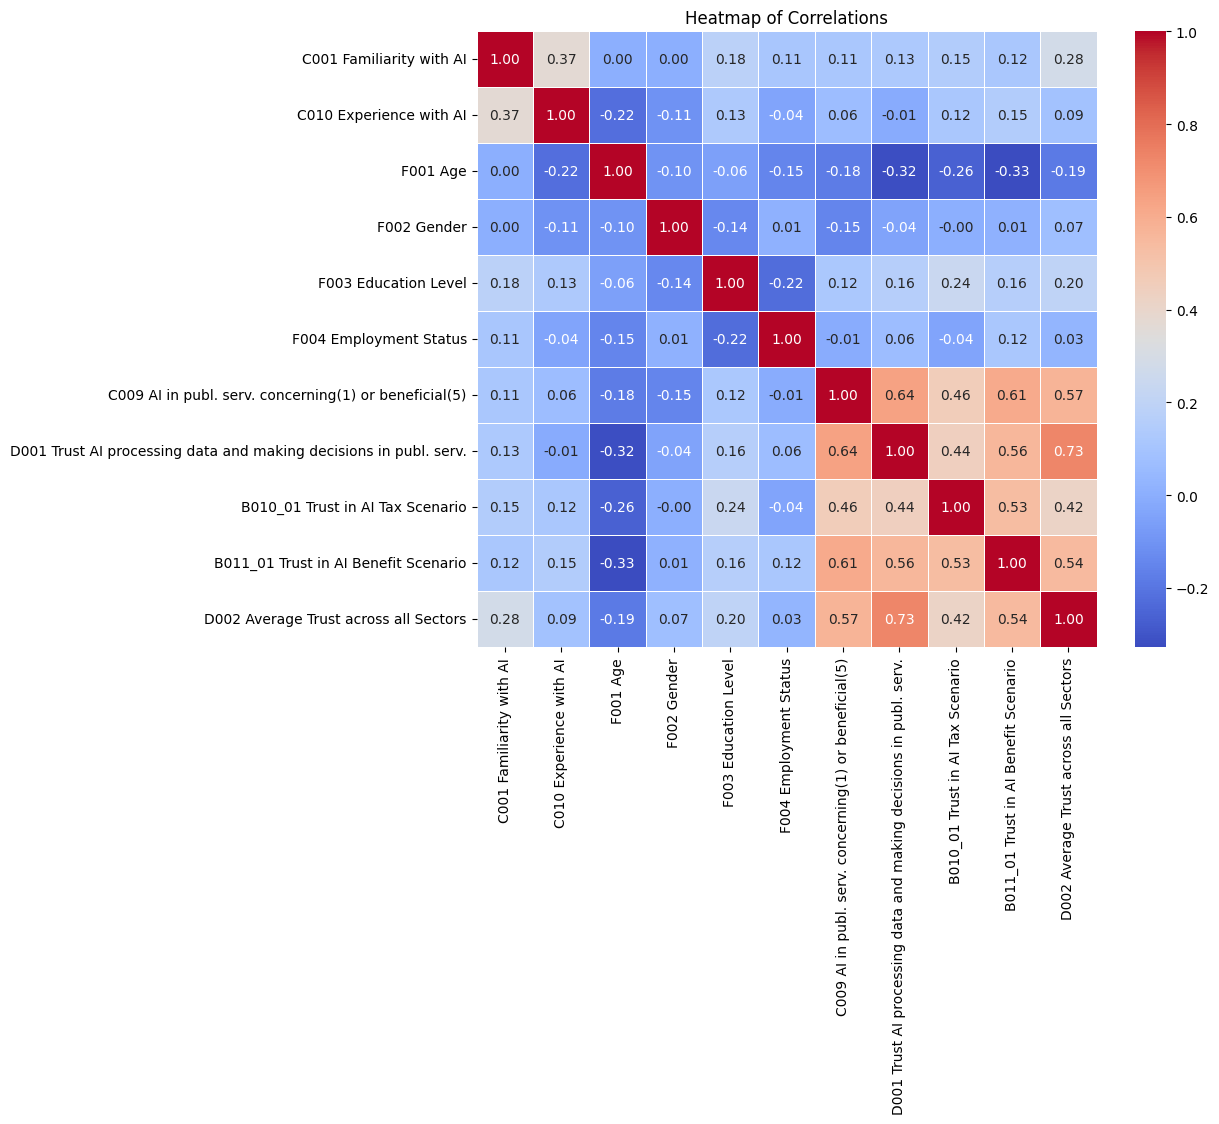

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Excel file
file_path = 'Data.xlsx'
data_df = pd.read_excel(file_path, sheet_name='Data')

# Strip column names to remove extra spaces
data_df.columns = data_df.columns.str.strip()

# Add the "D002_average" column
columns_to_average = ['D002_01', 'D002_02', 'D002_03', 'D002_04', 'D002_05', 'D002_06']
data_df['D002_average'] = data_df[columns_to_average].apply(pd.to_numeric, errors='coerce').mean(axis=1)

# Rename columns for clarity
data_df = data_df.rename(columns={
    'C001': 'C001 Familiarity with AI',
    'C010': 'C010 Experience with AI',
    'F001': 'F001 Age',
    'F002': 'F002 Gender',
    'F003': 'F003 Education Level',
    'F004': 'F004 Employment Status',
    'C009': 'C009 AI in publ. serv. concerning(1) or beneficial(5)',
    'D001': 'D001 Trust AI processing data and making decisions in publ. serv.',
    'B010_01': 'B010_01 Trust in AI Tax Scenario',
    'B011_01': 'B011_01 Trust in AI Benefit Scenario',
    'D002_average': 'D002 Average Trust across all Sectors'
})

# Define the two sets of columns
columns_set_1 = ['C001 Familiarity with AI', 'C010 Experience with AI', 'F001 Age', 'F002 Gender', 'F003 Education Level', 'F004 Employment Status']
columns_set_2 = ['C009 AI in publ. serv. concerning(1) or beneficial(5)', 'D001 Trust AI processing data and making decisions in publ. serv.', 'B010_01 Trust in AI Tax Scenario', 'B011_01 Trust in AI Benefit Scenario', 'D002 Average Trust across all Sectors']

# Filter the DataFrame for the relevant columns
relevant_columns = columns_set_1 + columns_set_2
filtered_data = data_df[relevant_columns].apply(pd.to_numeric, errors='coerce')

# Compute the correlation matrix
correlation_matrix = filtered_data.corr()

# Generate the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap of Correlations")
plt.show()


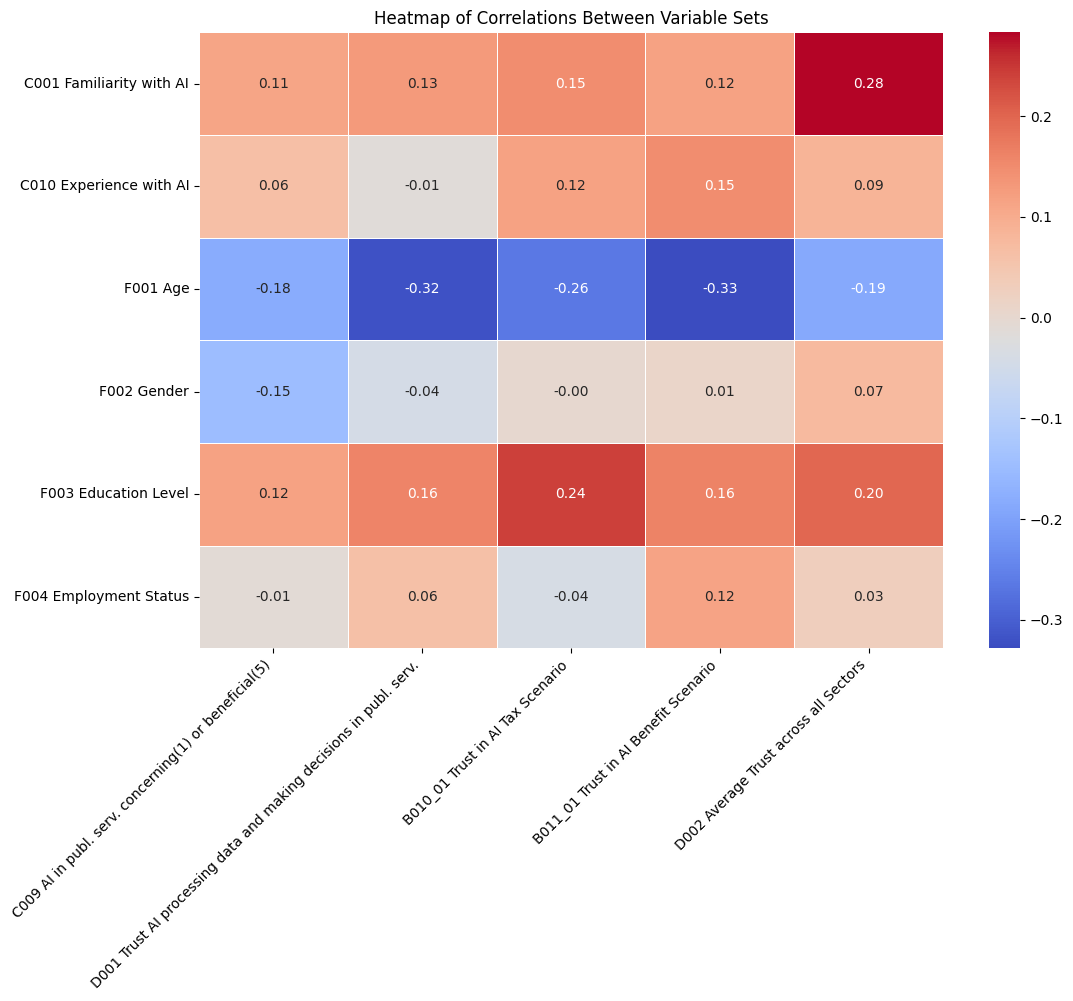

Pairwise Correlations:
Weak or no correlation (0.11) between C001 Familiarity with AI and C009 AI in publ. serv. concerning(1) or beneficial(5).
Weak or no correlation (0.13) between C001 Familiarity with AI and D001 Trust AI processing data and making decisions in publ. serv..
Weak or no correlation (0.15) between C001 Familiarity with AI and B010_01 Trust in AI Tax Scenario.
Weak or no correlation (0.12) between C001 Familiarity with AI and B011_01 Trust in AI Benefit Scenario.
Weak or no correlation (0.28) between C001 Familiarity with AI and D002 Average Trust across all Sectors.
Weak or no correlation (0.06) between C010 Experience with AI and C009 AI in publ. serv. concerning(1) or beneficial(5).
Weak or no correlation (-0.01) between C010 Experience with AI and D001 Trust AI processing data and making decisions in publ. serv..
Weak or no correlation (0.12) between C010 Experience with AI and B010_01 Trust in AI Tax Scenario.
Weak or no correlation (0.15) between C010 Experience 

In [14]:
# Additional imports for correlation matrix
import numpy as np

# Define the two sets of columns
set_1 = ['C001 Familiarity with AI', 'C010 Experience with AI', 'F001 Age', 'F002 Gender', 'F003 Education Level', 'F004 Employment Status']
set_2 = ['C009 AI in publ. serv. concerning(1) or beneficial(5)', 'D001 Trust AI processing data and making decisions in publ. serv.', 'B010_01 Trust in AI Tax Scenario', 'B011_01 Trust in AI Benefit Scenario', 'D002 Average Trust across all Sectors']

# Filter and ensure numeric data
relevant_columns = set_1 + set_2
data_df[relevant_columns] = data_df[relevant_columns].apply(pd.to_numeric, errors='coerce')

# Compute the correlation matrix
correlation_matrix = data_df[relevant_columns].corr()

# Extract correlations between the two sets
pairwise_correlation = correlation_matrix.loc[set_1, set_2]

# Display the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pairwise_correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.xticks(rotation=45, ha='right')
plt.title('Heatmap of Correlations Between Variable Sets')
plt.show()

# Detailed analysis of correlations
print("Pairwise Correlations:")
for col1 in set_1:
    for col2 in set_2:
        corr_value = pairwise_correlation.loc[col1, col2]
        if abs(corr_value) > 0.7:
            print(f"Strong correlation ({corr_value:.2f}) between {col1} and {col2}.")
        elif abs(corr_value) > 0.4:
            print(f"Moderate correlation ({corr_value:.2f}) between {col1} and {col2}.")
        else:
            print(f"Weak or no correlation ({corr_value:.2f}) between {col1} and {col2}.")


**Key Trends in the Heatmap and Correlation Matrix**

*High Positive Correlations:*

D002_average has a strong positive correlation with:
- D001 (0.73): This suggests that as D002_average increases, so does D001.
- C009 (0.57) and B011_01 (0.54): These variables also show a significant positive relationship with D002_average.
- C009 and D001 (0.64): A moderate-to-strong positive correlation exists between these two variables.


*Clusters of Relationships:*
Variables like D002 Average Trust across all Sectors, C009 AI in publ. serv. concerning(1) or beneficial(5), and D001 Trust AI processing data and making decisions in publ. serv. show stronger relationships with each other, suggesting they might be part of a common underlying trend or phenomenon.

    > This supports the validity of the study as the following variables show a strong positive correlation:
        D002 Average Trust across all Sectors
        C009 AI in publ. serv. concerning(1) or beneficial(5)
        D001 Trust AI processing data and making decisions in publ. serv.
        B011_01 Trust in AI Benefit Scenario
    >> This proves that when asked about trust in different questions and settings, participants mostly answered consistently across all questions.


*Weak or Negative Correlations:*
F004 Employment Status has weak negative correlations with most variables. This is irrelevant as the Employment Status does not have a numeric scale, it is a random list of possible employment statuses.

Variables from the first set (F001, F002, F003, etc.) generally show weaker correlations with the second set.

*There are two weak correlations worth mentioning:*

C001 & D002 Average
- Weak or no correlation (0.28) between C001 Familiarity with AI and D002 Average Trust across all Sectors
    > The higher the familiarity with AI, the higher the trust in using AI across the different sectors.
    
F001 & others
- Weak or no correlation (-0.32) between F001 Age and D001 Trust AI processing data and making decisions in publ. serv..
- Weak or no correlation (-0.26) between F001 Age and B010_01 Trust in AI Tax Scenario.
- Weak or no correlation (-0.33) between F001 Age and B011_01 Trust in AI Benefit Scenario.
    > The higher the age, the lower the trust in AI processing data and making decisions in public services (D001), the lower the trust in both scenarios (B010 tax scenario; B011 benefits scenario).


Experience with AI (C010) does not correlate with trust in AI.


In [10]:
from scipy.stats import pearsonr
import pandas as pd
import numpy as np

# Define a function to calculate correlation coefficients and p-values
def calculate_correlation_and_pvalues(df, set_1, set_2):
    correlation_matrix = pd.DataFrame(index=set_1, columns=set_2)
    pvalue_matrix = pd.DataFrame(index=set_1, columns=set_2)

    for col1 in set_1:
        for col2 in set_2:
            # Drop NaN values for the two columns
            valid_data = df[[col1, col2]].dropna()
            if valid_data.empty:  # If no valid data points, set NaN
                correlation_matrix.loc[col1, col2] = np.nan
                pvalue_matrix.loc[col1, col2] = np.nan
            else:
                corr, pval = pearsonr(valid_data[col1], valid_data[col2])
                correlation_matrix.loc[col1, col2] = corr
                pvalue_matrix.loc[col1, col2] = pval

    return correlation_matrix, pvalue_matrix

# Define variable sets
set_1 = ['C001', 'C010', 'F001', 'F002', 'F003', 'F004']  # First set
set_2 = ['C009', 'D001', 'B010_01', 'B011_01', 'D002_average']  # Second set

# Calculate correlation and p-values
correlation_matrix, pvalue_matrix = calculate_correlation_and_pvalues(data_sheet, set_1, set_2)

# Print the matrices
print("Correlation Matrix:")
print(correlation_matrix)

print("\nP-value Matrix:")
print(pvalue_matrix)


ValueError: data type <class 'numpy.object_'> not inexact